In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = yf.download('TSLA', start = '2020-01-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
def MACD(df):
    df['EMA12'] = df.Close.ewm(span=12).mean()
    df['EMA26'] = df.Close.ewm(span=26).mean()
    df['MACD'] = df.EMA12 - df.EMA26
    df['signal'] = df.MACD.ewm(span=9).mean()
    print('indicators added')

In [4]:
MACD(df)

indicators added


In [5]:
df

,Open,High,Low,Close,Adj Close,Volume,EMA12,EMA26,MACD,signal
Date,,,,,,,,,,
2019-12-31,81.000000,84.258003,80.416000,83.666000,83.666000,51428500,83.666000,83.666000,0.000000,0.000000
2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500,84.958418,84.904886,0.053532,0.029740
2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500,86.380508,86.233222,0.147286,0.077914
2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000,87.620263,87.372352,0.247912,0.135502
2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500,89.302535,88.865732,0.436803,0.225132
...,...,...,...,...,...,...,...,...,...,...
2021-11-29,1100.989990,1142.670044,1100.189941,1136.989990,1136.989990,19464500,1104.046738,1063.635154,40.411584,49.022207
2021-11-30,1144.369995,1168.000000,1118.000000,1144.760010,1144.760010,27092000,1110.310318,1069.644403,40.665915,47.350949
2021-12-01,1160.699951,1172.839966,1090.760010,1095.000000,1095.000000,22816800,1107.954884,1071.522595,36.432289,45.167217


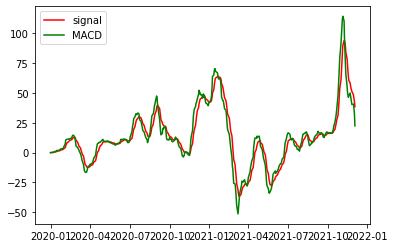

In [6]:
plt.plot(df.signal, label='signal', color='red')
plt.plot(df.MACD, label='MACD', color ='green')
plt.legend()
plt.show()

In [7]:
Buy, Sell = [],[]

for i in range(2, len(df)):
    if df.MACD.iloc[i] > df.signal.iloc[i] and df.MACD.iloc[i-1] < df.signal.iloc[i-1]:
        Buy.append(i)
    elif df.MACD.iloc[i] < df.signal.iloc[i] and df.MACD.iloc[i-1] > df.signal.iloc[i-1]:
        Sell.append(i)

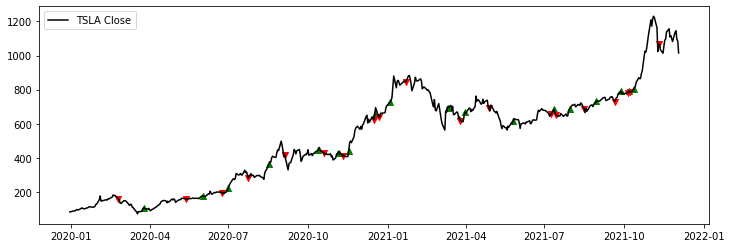

In [8]:
plt.figure(figsize=(12,4))
plt.scatter(df.iloc[Buy].index, df.iloc[Buy].Close, marker='^', color ='green')
plt.scatter(df.iloc[Sell].index, df.iloc[Sell].Close, marker='v', color ='red')
plt.plot(df.Close, label ='TSLA Close', color='k')
plt.legend()
plt.show()

In [9]:
Realbuys = [i+1 for i in Buy]
Realsells = [i+1 for i in Sell]

In [10]:
Buyprices = df.Open.iloc[Realbuys]
Sellprices = df.Open.iloc[Realsells]

In [11]:
Buyprices

Date
2020-03-27    101.000000
2020-06-03    177.623993
2020-07-02    244.296005
2020-08-18    379.798004
2020-10-14    449.779999
2020-11-09    439.500000
2020-11-18    448.350006
2020-12-18    668.900024
2021-01-05    723.659973
2021-03-15    694.090027
2021-04-01    688.369995
2021-05-27    620.239990
2021-07-13    686.320007
2021-08-02    700.000000
2021-08-31    733.000000
2021-09-28    787.200012
2021-10-08    796.210022
2021-10-13    810.469971
Name: Open, dtype: float64

In [12]:
if Sellprices.index[0] < Buyprices.index[0]:
    Sellprices = Sellprices.drop(Sellprices.index[0])
elif Buyprices.index[-1] > Sellprices.index[-1]:
    Buyprices = Buyprices.drop(Buyprices.index[-1])

In [13]:
profitsrel = []
for i in range(len(Sellprices)):
    profitsrel.append((Sellprices[i] - Buyprices[i])/Buyprices[i])

In [14]:
pd.DataFrame(profitsrel).mean()

0    0.078199
dtype: float64